This is assignment 1 solution for Ismaila Shaibu.
Student Id: 2263286
Email: IXS186@student.bham.ac.uk
Name: Ismaila Shaibu

Question one solution
1. Using 3-fold cross-validation to select an optimal polynomial model using least squares estimation without regularization.
   i. state the optimal degree of polynomial and print its parameter accurate to three decimal places.
   ii. Plot the fitted line and comment on whether it appears to represent the data well. Do you think it will generalise well to unseen data?
   iii. State clearly your estimates of t for the missing values of x. 

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('assignment1.csv').to_numpy()
x = df[:,1].reshape((-1,1))
t = df[:,2].reshape((-1,1))


In [291]:
t = np.array(t).ravel()
x = np.array(x).ravel()

Text(0, 0.5, 't')

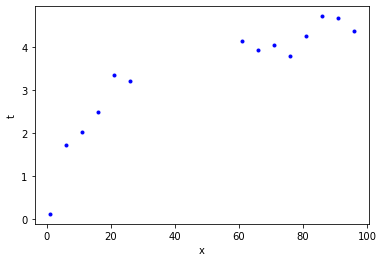

In [292]:
plt.figure()
plt.plot(x,t,'b.')
plt.xlabel('x')
plt.ylabel('t')

 CROSS VALIDATION

Order & Train & Valid \\
0 & 1.213 & 1.248
1 & 0.575 & 0.789
2 & 0.214 & 0.436
3 & 0.174 & 0.425
4 & 0.139 & 1.535
5 & 0.000 & 23.355
6 & 0.000 & 35.998


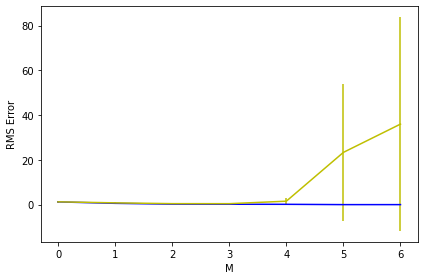

In [293]:
# Construct the dataset
# the combined data for cross-validation 9 pts: Based on available data from the csv file.
xtrainval = x[0:9]
ttrainval = t[0:9]
# a test set of 5 pts: based on available data from the csv file
xtest = x[9:14]
ttest = t[9::14]

# split the dataset into three random folds

# First, combine the x and t data into a single array
trainval = np.concatenate([np.atleast_2d(xtrainval).T,np.atleast_2d(ttrainval).T],axis=1)

# Randomise the order
trainval = np.random.permutation(trainval)

# Split the dataset, remembering that we randomised the order of the data points. We'll split into K=3 folds.
Folds = [ trainval[0:3], trainval[3:6], trainval[6:9] ]

M = [0,1,2,3,4,5,6] # max polynomial order set to 6 because the training 
K = 3 # number of folds
rmstrain = [] # error on the training folds
rmsvalid = [] # RMS error on the validation fold
stdtrain = [] # standard deviation over the training sets
stdvalid = [] # standard deviation over the validation sets

for i in M:
    # Record the performance on the folds
    train_loss = []
    validation_loss = []
    for j in range(K):
        # Select the one validation fold
        Valid = Folds[j]
        # Select and combine the K-1 training folds
        Train = np.concatenate(Folds[:j]+Folds[j+1:])
        # Compute the basis matrix for the training and validation folds
        PhiTrain = np.array([pow(Train[:,0],j) for j in range(0,i+1)]).transpose()
        PhiValid = np.array([pow(Valid[:,0],j) for j in range(0,i+1)]).transpose()
        # Train the model
        w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),Train[:,1]))
        # Compute the error on the training set
        train_loss.append(np.sqrt(np.average(pow(Train[:,1]-np.matmul(PhiTrain,w),2))))
        # Compute the error on the validation set
        validation_loss.append(np.sqrt(np.average(pow(Valid[:,1]-np.matmul(PhiValid,w),2))))
    # Record the average over the folds
    rmstrain.append(np.average(train_loss))
    rmsvalid.append(np.average(validation_loss))
    stdtrain.append(np.std(train_loss))
    stdvalid.append(np.std(validation_loss))    
    
plt.figure()
plt.errorbar(M,rmstrain,fmt='b-',yerr=stdtrain,label="Train")
plt.errorbar(M,rmsvalid,fmt='y-',yerr=stdvalid,label="Validation")
plt.xlabel('M')
plt.ylabel('RMS Error')
plt.tight_layout()
plt.savefig('cross-validation-loss.png')

print("Order & Train & Valid \\\\")
for i in M:
    print(f"{i:d} & {rmstrain[i]:.3f} & {rmsvalid[i]:.3f}")

A close look at the plot of RMS error versus polynomial order M:
the plot at M = 3 gives the optimal polynomial model. 

Also we can see the sharp rise in validation after M = 3.

Training loss = 0.21
Test loss = 1.11
weights parameters = [[ 0.162  0.212 -0.004  0.   ]]


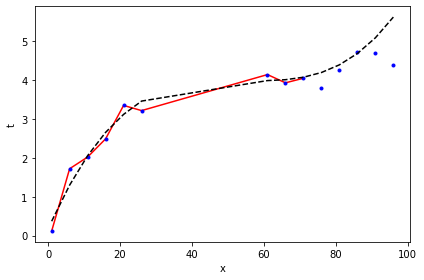

In [294]:
# Recompute the basis for the cubic model
polyorder = 3
PhiTrain = np.array([pow(xtrainval,j) for j in range(0,polyorder+1)]).transpose()
PhiTest = np.array([pow(xtest,j) for j in range(0,polyorder+1)]).transpose()
hiPhi = np.array([pow(x,j) for j in range(0,polyorder+1)]).transpose()

weights = []
# Solve the normal equations using a standard solver
w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),ttrainval))
weights.append(w)
# Compute the estimated values of the data points so we can compute the error
ytrain = np.matmul(PhiTrain,w)
ytest = np.matmul(PhiTest,w)
# compute the RMS error
training_loss = np.sqrt(np.sum(pow(ttrainval-ytrain,2)/xtrainval.size))
test_loss = np.sqrt(np.sum(pow(ttest-ytest,2)/xtest.size))
print(f"Training loss = {training_loss:.2f}")
print(f"Test loss = {test_loss:.2f}")
print(f"weights parameters = {np.around(weights, 3)}")
# Plot the data
plt.figure()
plt.plot(xtrainval,ttrainval,'r-')
#plt.plot(xtest,ttest,'r.')
plt.plot(x,t,'b.')
plt.plot(x,np.matmul(hiPhi,w),'k--')
plt.xlabel('x')
plt.ylabel('t')
plt.tight_layout()
plt.savefig('cross-validation-result.png')

The plot of the fitted line represents the data well. 

I believe it will generalize well to unseen data. 

estimation of the missing values of x. 

At the point we need to consider all the data point 

In [295]:
x

array([ 1.,  6., 11., 16., 21., 26., 61., 66., 71., 76., 81., 86., 91.,
       96.])

In [296]:
y = np.array([31,36,41,46,51,56])
z = np.insert(x, 6, y, axis=None)

In [297]:
z

array([ 1.,  6., 11., 16., 21., 26., 31., 36., 41., 46., 51., 56., 61.,
       66., 71., 76., 81., 86., 91., 96.])

In [298]:
x = z
x = np.array(x).ravel()

In [299]:
Npts = 20
sigma = 0.1
x = np.atleast_2d(x).T
Phi = np.concatenate((np.ones((Npts,1)),x, x**2, x**3),axis=1)


In [300]:
wtrue = np.array([0.162, 0.212, -0.004, 0. ])
h = np.matmul(Phi,wtrue)
t = h + sigma*np.random.randn(Npts)


In [301]:
x = np.array(x).ravel()

In [302]:
estimate_missig_values = pd.DataFrame({"x": x, "t" : t})

In [303]:
print(estimate_missig_values)

       x          t
0    1.0   0.265942
1    6.0   1.280369
2   11.0   1.912365
3   16.0   2.386763
4   21.0   2.551645
5   26.0   3.092668
6   31.0   2.887435
7   36.0   2.594452
8   41.0   2.029671
9   46.0   1.427267
10  51.0   0.420340
11  56.0  -0.596430
12  61.0  -1.608708
13  66.0  -3.163868
14  71.0  -4.978673
15  76.0  -6.706307
16  81.0  -8.841195
17  86.0 -11.043558
18  91.0 -13.471943
19  96.0 -16.221510


Question 2

In [304]:
alpha = 2.0
beta = (1/sigma)**2
m0 = np.zeros(wtrue.size)
S0 = (1/alpha)*np.eye(wtrue.size)

In [305]:
xsample = np.atleast_2d(x)
tsample = np.atleast_2d(t).T
Phisample = np.atleast_2d(Phi)
invS0 = alpha*np.eye(wtrue.size)
invSN = invS0 + beta*np.matmul(Phisample.T,Phisample)
SN = np.linalg.inv(invSN)
mN = np.squeeze(beta*np.matmul(SN,np.matmul(Phisample.T,tsample)))

In [306]:
print(mN)

[ 8.50943079e-02  2.09648847e-01 -3.90883022e-03 -4.19311385e-07]


In [307]:
weights = np.array(weights).ravel()

In [308]:
maximum_likelihood_versus_mean_of_posterior = pd.DataFrame({"Maximum_likelihood": weights, "mean_of_posterior" : mN})

In [309]:
print(maximum_likelihood_versus_mean_of_posterior)

   Maximum_likelihood  mean_of_posterior
0            0.162295       8.509431e-02
1            0.212175       2.096488e-01
2           -0.003901      -3.908830e-03
3            0.000024      -4.193114e-07


Mean of posterior got to a maximum at the first value of Wtrue before maximum likelihood.

This is likely due to the prior consideration for mean of posterior.

Maximum likelihood estimate will be identical to mean of posterior if covariance approximate to zero. That is variance of each parameter tending to infinity. 

In [310]:
print(SN)

[[ 6.46706688e-03 -4.94167951e-04  1.00649704e-05 -5.97717819e-08]
 [-4.94167951e-04  5.35992069e-05 -1.25262689e-06  8.01102111e-09]
 [ 1.00649704e-05 -1.25262689e-06  3.14065059e-08 -2.09781870e-10]
 [-5.97717819e-08  8.01102111e-09 -2.09781870e-10  1.44294844e-12]]


The values of SN show that, as it approximate to zero maximum likelihood and mean of posterior got identical value of approximately -0.004

Question 3

In [311]:
Npts = 20
sigma = 0.1
x = np.atleast_2d(x).T
Phi = np.concatenate((np.ones((Npts,1)),x, x**2, x**3),axis=1)

In [312]:
wtrue = np.array([0.162, 0.212, -0.004, 0. ])
h = np.matmul(Phi,wtrue)
t = h + sigma*np.random.randn(Npts)

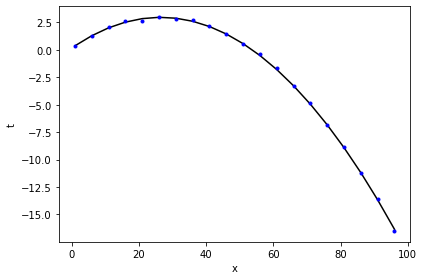

In [313]:
plt.figure()
plt.plot(x,h,'k-',x,t,'b.')
plt.xlabel('x')
plt.ylabel('t')
plt.tight_layout()

In [314]:
y = np.array([101,106,111,116,120])
z = np.insert(x, 20, y, axis=None)

In [315]:
x = z
x

array([  1.,   6.,  11.,  16.,  21.,  26.,  31.,  36.,  41.,  46.,  51.,
        56.,  61.,  66.,  71.,  76.,  81.,  86.,  91.,  96., 101., 106.,
       111., 116., 120.])

In [316]:
Npts = 25
sigma = 0.1
x = np.atleast_2d(x).T
Phi = np.concatenate((np.ones((Npts,1)),x, x**2, x**3),axis=1)

In [317]:
wtrue = np.array([0.162, 0.212, -0.004, 0. ])
h = np.matmul(Phi,wtrue)
t = h + sigma*np.random.randn(Npts)

In [318]:
x = np.array(x).ravel()

In [319]:
# Allow up to polynomials of degree 8
nw = 8
# Create the model
Phi = np.array([pow(x,j) for j in range(0,nw)]).transpose()
# Select up to 20 random points from the model
sample_indices = np.random.choice(np.linspace(0,Npts-1,Npts).astype(int),size=19,replace=False)



In [320]:
# Set up the initial state
alpha = 2.0
beta = (1/sigma)**2
m0 = np.zeros(nw)
S0 = (1/alpha)*np.eye(nw)

C:\Users\FLUXNATURE\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


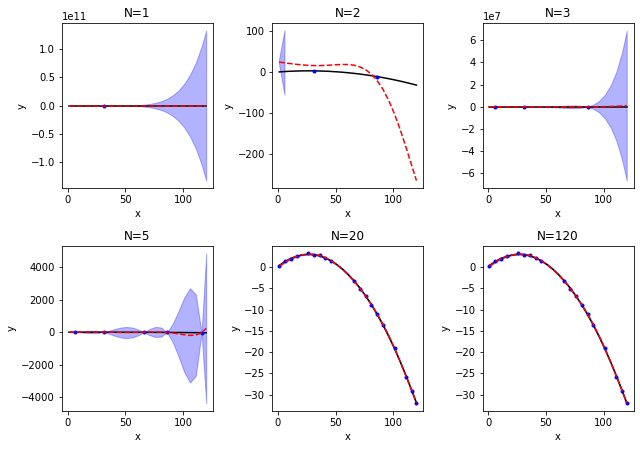

In [321]:
plt.figure(figsize=[9,9])
for i,npts in enumerate([1,2,3,5,20,120]):
    xsample = np.atleast_2d(x[sample_indices[0:npts]])
    tsample = np.atleast_2d(t[sample_indices[0:npts]]).T
    Phisample = np.atleast_2d(Phi[sample_indices[0:npts]])
    invS0 = alpha*np.eye(nw)
    invSN = invS0 + beta*np.matmul(Phisample.T,Phisample)
    SN = np.linalg.inv(invSN)
    mN = np.squeeze(beta*np.matmul(SN,np.matmul(Phisample.T,tsample)))
    sigmasq = (1/beta) + np.diag(np.matmul(Phi,np.matmul(SN,Phi.T)))
    plt.subplot(3,3,i+1)
    plt.plot(x,h,'k-')
    plt.plot(np.squeeze(xsample),np.squeeze(tsample),'b.')
    y = np.matmul(Phi,mN)
    plt.plot(x,y,'r--')
    plt.fill_between(x,y-np.sqrt(sigmasq), y+np.sqrt(sigmasq),color='blue',alpha=0.3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'N={npts}')
    plt.tight_layout()
plt.savefig('bayesianprediction.png')

We see clearly that as more data point is added, it reduces the uncertainty around the model predictions. 

When we have about 20 data points, uncertainty was greatly reduced. 